#Assignment 1:Data Exploration
-Load Uber.csv Dataset
-Display the number of rows and columns
-Show unique categories in the CATEGORY column
-Find how many null values are there in PURPOSE
-Renmae all columns in uppercase


In [4]:
import pandas as pd
uber_data=pd.read_csv(r"C:\Users\Sameera\OneDrive\Desktop\dataset\Uber_Drives_2016.csv")
print(uber_data.head())


      START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*  
0     5.1   Meal/Entertain  
1     5.0              NaN  
2     4.8  Errand/Supplies  
3     4.7          Meeting  
4    63.7   Customer Visit  


In [5]:
print(uber_data.shape)


(1156, 7)


In [6]:
print(uber_data['CATEGORY*'].unique())


['Business' 'Personal' nan]


In [7]:
print(uber_data['PURPOSE*'].isnull().sum())

503


In [8]:
uber_data.columns=uber_data.columns.str.upper()
print(uber_data.head())

      START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*  
0     5.1   Meal/Entertain  
1     5.0              NaN  
2     4.8  Errand/Supplies  
3     4.7          Meeting  
4    63.7   Customer Visit  


#Assignment 2:Data Filtering&Transformation
-Display rides where CATEGORY =='Business'
-show top 5 rides with the longest distance(MILES)
-Replace all missing PURPOSE values with "Not Specifed"
-Create a new column TRIP_DURATION using END_DTATE - SRART_DATE
-sort trips by distance in descending order

In [10]:
business_rides=uber_data[uber_data['CATEGORY*']=='Business']
print("\n Business Rides:\n",business_rides.head())


 Business Rides:
       START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*  
0     5.1   Meal/Entertain  
1     5.0              NaN  
2     4.8  Errand/Supplies  
3     4.7          Meeting  
4    63.7   Customer Visit  


In [14]:
longest_rides=uber_data.sort_values(by='MILES*',ascending=False).head(5)
print(longest_rides)

           START_DATE*         END_DATE* CATEGORY*            START*  \
1155            Totals               NaN       NaN               NaN   
269    3/25/2016 16:52   3/25/2016 22:22  Business             Latta   
270    3/25/2016 22:54    3/26/2016 1:39  Business      Jacksonville   
881   10/30/2016 15:22  10/30/2016 18:23  Business         Asheville   
776    9/27/2016 21:01    9/28/2016 2:37  Business  Unknown Location   

                 STOP*   MILES*        PURPOSE*  
1155               NaN  12204.7             NaN  
269       Jacksonville    310.3  Customer Visit  
270          Kissimmee    201.0         Meeting  
881             Mebane    195.9             NaN  
776   Unknown Location    195.6             NaN  


In [16]:
uber_data['PURPOSE*']=uber_data['PURPOSE*'].fillna('Not Specified')

In [21]:
uber_data=uber_data[uber_data['START_DATE*']!='Totals'].copy()
uber_data['START_DATE*']=pd.to_datetime(uber_data['START_DATE*'])
uber_data['END_DATE*']=pd.to_datetime(uber_data['END_DATE*'])
uber_data['TRIP_DURATION']=uber_data['END_DATE*']-uber_data['START_DATE*']


In [22]:
sorted_trips=uber_data.sort_values(by='MILES*',ascending=False)
print(sorted_trips.head())

            START_DATE*           END_DATE* CATEGORY*            START*  \
269 2016-03-25 16:52:00 2016-03-25 22:22:00  Business             Latta   
270 2016-03-25 22:54:00 2016-03-26 01:39:00  Business      Jacksonville   
881 2016-10-30 15:22:00 2016-10-30 18:23:00  Business         Asheville   
776 2016-09-27 21:01:00 2016-09-28 02:37:00  Business  Unknown Location   
546 2016-07-14 16:39:00 2016-07-14 20:05:00  Business       Morrisville   

                STOP*  MILES*        PURPOSE*   TRIP_DURATION  
269      Jacksonville   310.3  Customer Visit 0 days 05:30:00  
270         Kissimmee   201.0         Meeting 0 days 02:45:00  
881            Mebane   195.9   Not Specified 0 days 03:01:00  
776  Unknown Location   195.6   Not Specified 0 days 05:36:00  
546        Banner Elk   195.3   Not Specified 0 days 03:26:00  


#Assignment 3:Grouping and Aggregation

-Group by  CATEGORY and find average miles per category.
-Find total trips for each PURPOSE.
-Identify top 3 start locations by number of rides.
-plot:
 -A bar chart of average miles by category.
 -A pie chart of trip purposes.

In [23]:
import matplotlib.pyplot as plt

avg_miles=uber_data.groupby('CATEGORY*')['MILES*'].mean()
print(avg_miles)

CATEGORY*
Business    10.655844
Personal     9.320779
Name: MILES*, dtype: float64


In [25]:
purpose_counts=uber_data['PURPOSE*'].value_counts()
print("\n Total trips by purpose:\n",purpose_counts) 


 Total trips by purpose:
 PURPOSE*
Not Specified      502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: count, dtype: int64


In [26]:
top_starts=uber_data['START*'].value_counts().head(3)
print(top_starts)

START*
Cary                201
Unknown Location    148
Morrisville          85
Name: count, dtype: int64


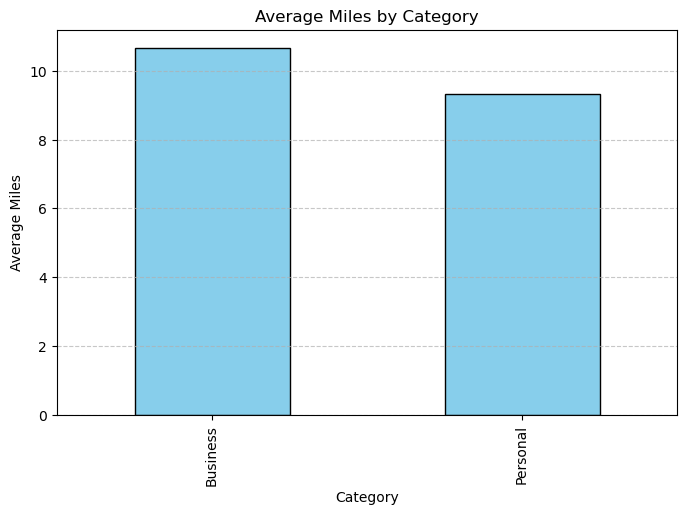

In [27]:

plt.figure(figsize=(8,5))
avg_miles.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Miles by Category')
plt.xlabel('Category')
plt.ylabel('Average Miles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

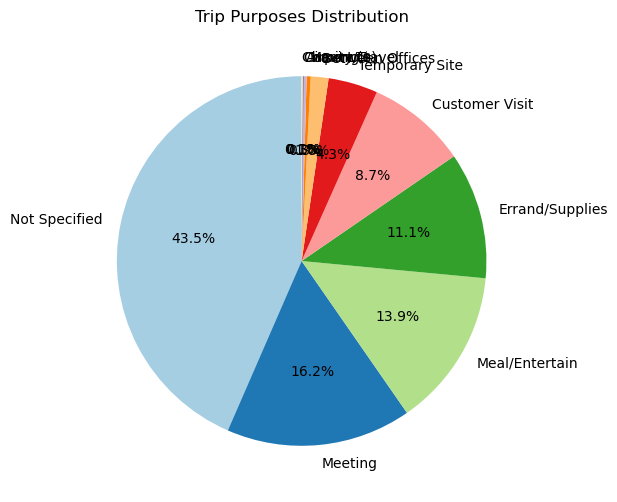

In [28]:
plt.figure(figsize=(6,6))
purpose_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Trip Purposes Distribution')
plt.ylabel('')
plt.show()